In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
from matplotlib.patches import Rectangle
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import wilcoxon

In [2]:
def plot_HK_scatter(dataName, modelName, a2, ma, xlabel, show_xticks):
    data = sio.loadmat('../HK_reactions_analysis/HK_in_core_'+dataName+'.mat')
    contexts = [str(i[0][0]).upper() for i in data['contexts']]
    df = pd.DataFrame(columns = ['Context','Threshold','nHK'])
    thrs = ['Localgini','LocalT2','StanDep']
    files =[i+modelName for i in ['nHK_LG_','nHK_LT2_','nHK_SD_']]
    for i,t in enumerate(files):
        df = pd.concat([df,pd.DataFrame({'Context':contexts,'Threshold':[thrs[i]]*len(contexts),'Number of Housekeeping reactions':data[t].flatten()})])
    df2 = pd.DataFrame(columns = contexts, index = thrs)
    for i,t in enumerate(files):
        df2.loc[thrs[i]] = data[t].flatten()
    df2 = df2.astype(float)
    max_idx = df2.idxmax(axis=0).value_counts()

    a1=100
    mi = 0
    space = 100

    fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(20, 10),gridspec_kw={'height_ratios': [ma-a2, a1-mi],'hspace': 0.05})
    sns.lineplot(df, x='Context', y='Number of Housekeeping reactions', hue='Threshold', ax=ax1,style="Threshold",dashes=False,markers=True,markersize=10)


    ax1.tick_params(axis='x',which='both',bottom=False)
    ax1.set_ylabel('')
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)


    ax2.set_ylim(mi,a1)
    ax1.set_ylim(a2,ma)
    ax1.set_yticks(np.arange(a2,ma,space))
    ax2.set_yticks(np.arange(mi,a1,space))
    if show_xticks:
        ax2.set_xticklabels(contexts, rotation=45, fontsize=15, ha='right')
    else:
        ax2.set_xticklabels(contexts, rotation=45, fontsize=15, ha='right', color='white')
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=20)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=20)

    if show_xticks:
        fig.text(0.5, -0.1, xlabel, ha='center', va='center', fontweight='bold', fontsize=35)
    else:
        fig.text(0.5, -0.1, xlabel, ha='center', va='center', fontweight='bold', fontsize=35, color='white')
    fig.text(0.07,0.5, 'Number of Housekeeping reactions', ha='center', va='center', fontweight='bold', fontsize=20, rotation=90)

    # getting the details of the labels in the legend
    handles, labels = ax1.get_legend_handles_labels()
    for i in thrs:
        idx = labels.index(i)
        if i in max_idx.index:
            labels[idx] =  i+' (Max in '+str(max_idx[i])+' models)'
    
    ax1.legend(handles, labels, fontsize=20, loc='upper right')

    d = .005
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (0, 0), **kwargs)      
    kwargs.update(transform=ax2.transAxes)  
    ax2.plot((-d, +d), (1, 1), **kwargs)
    plt.savefig('HK_in_core_'+dataName+'_'+modelName+'.png',bbox_inches='tight')

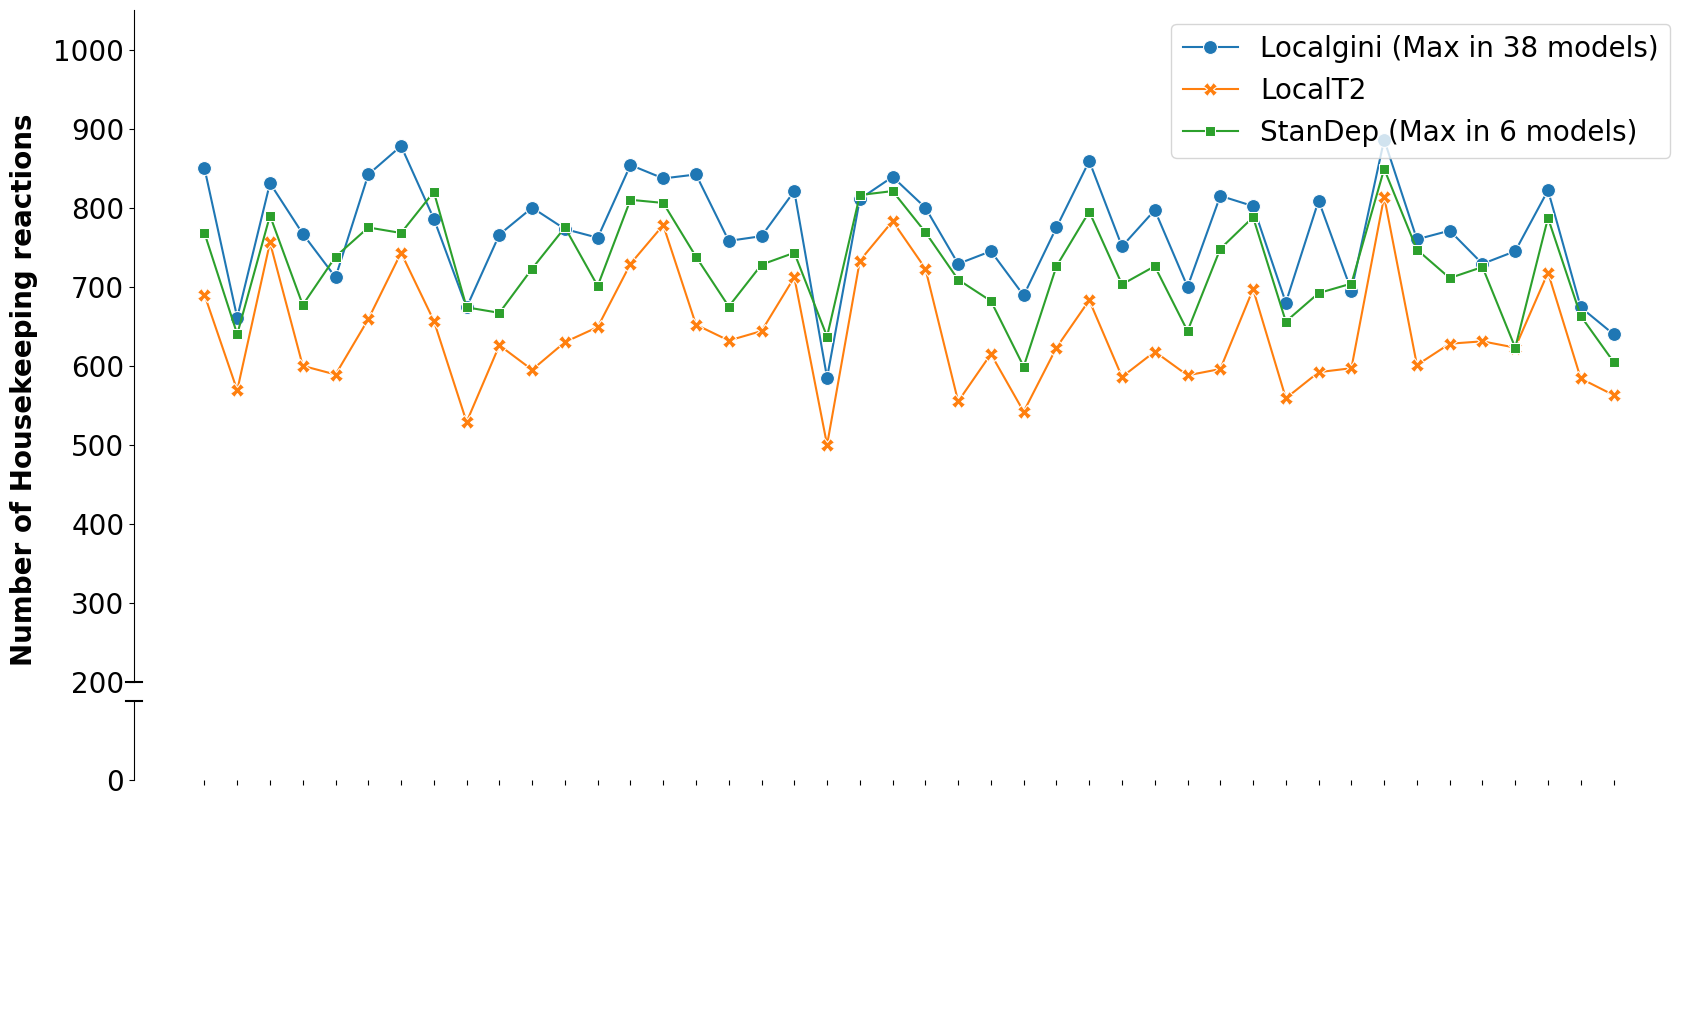

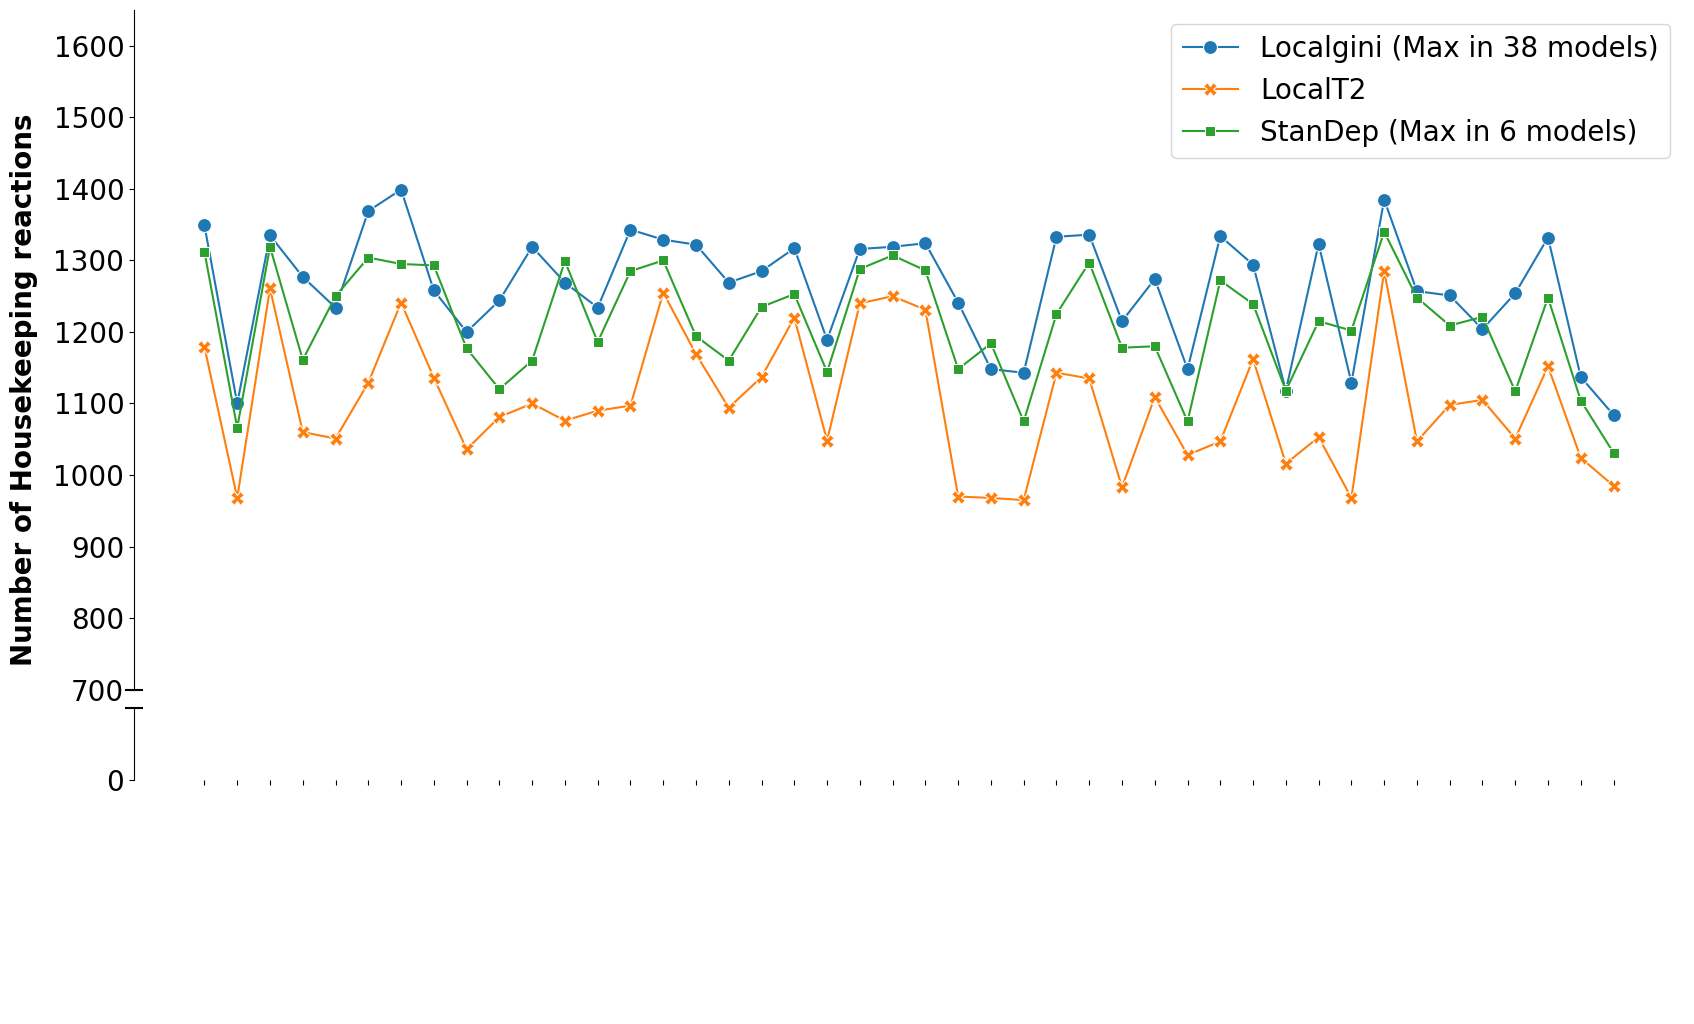

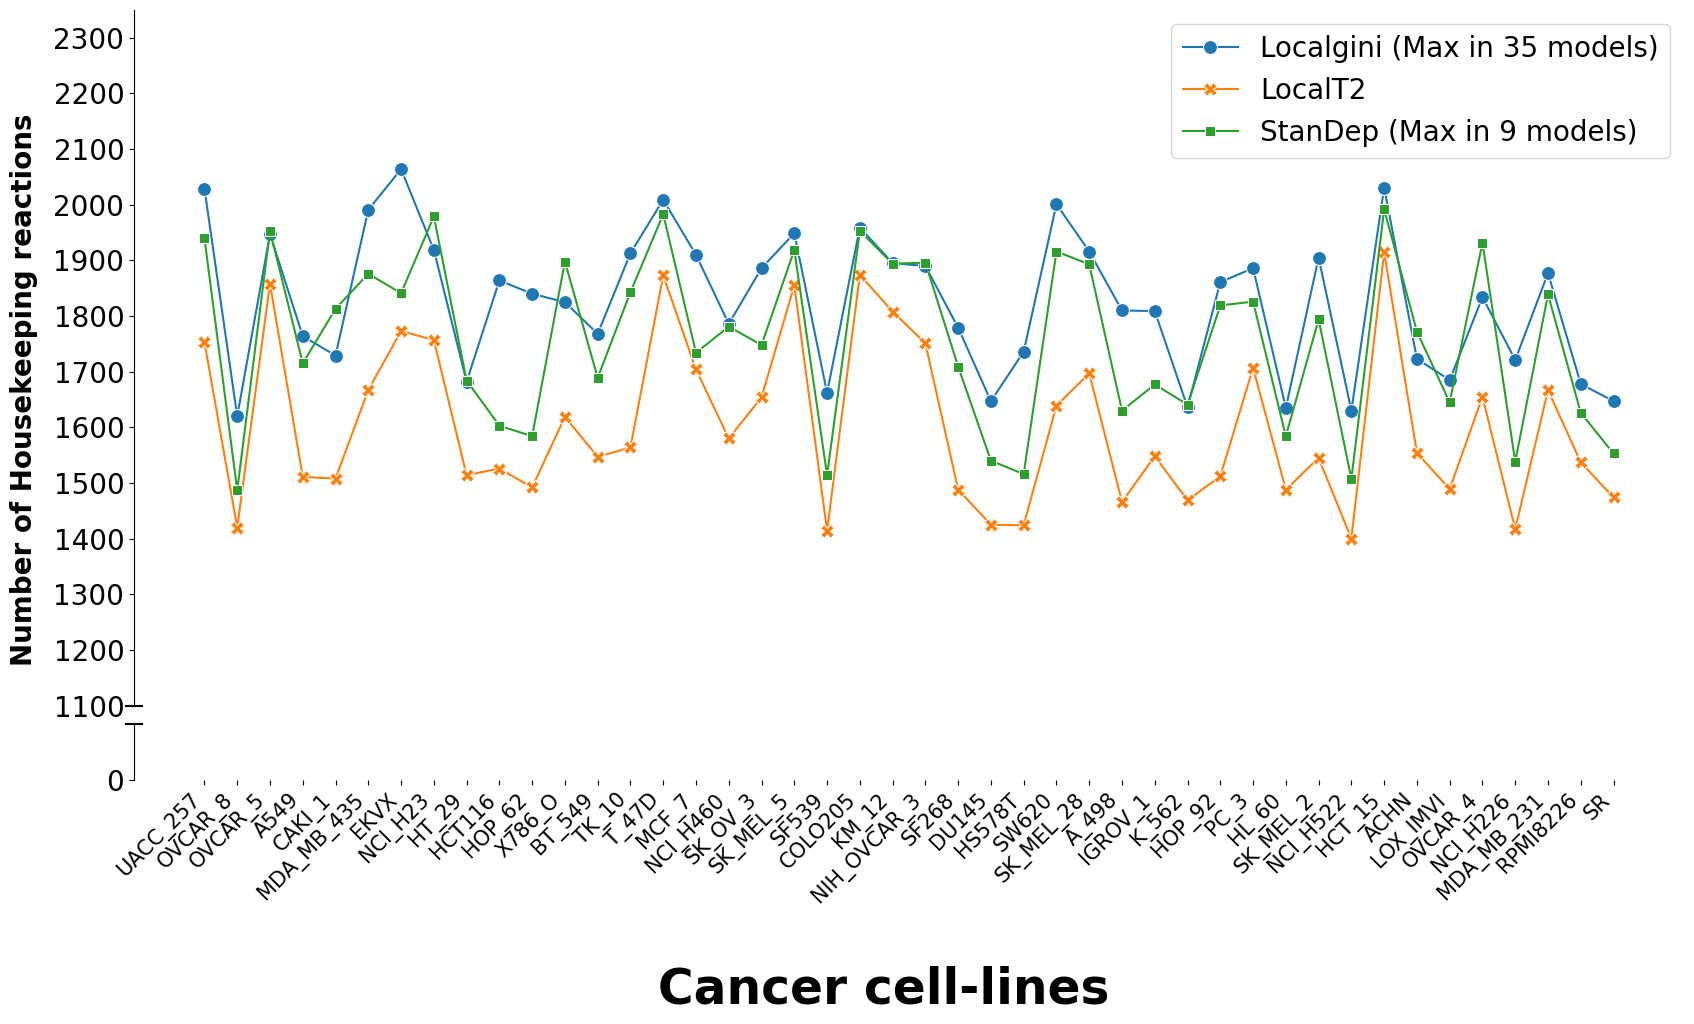

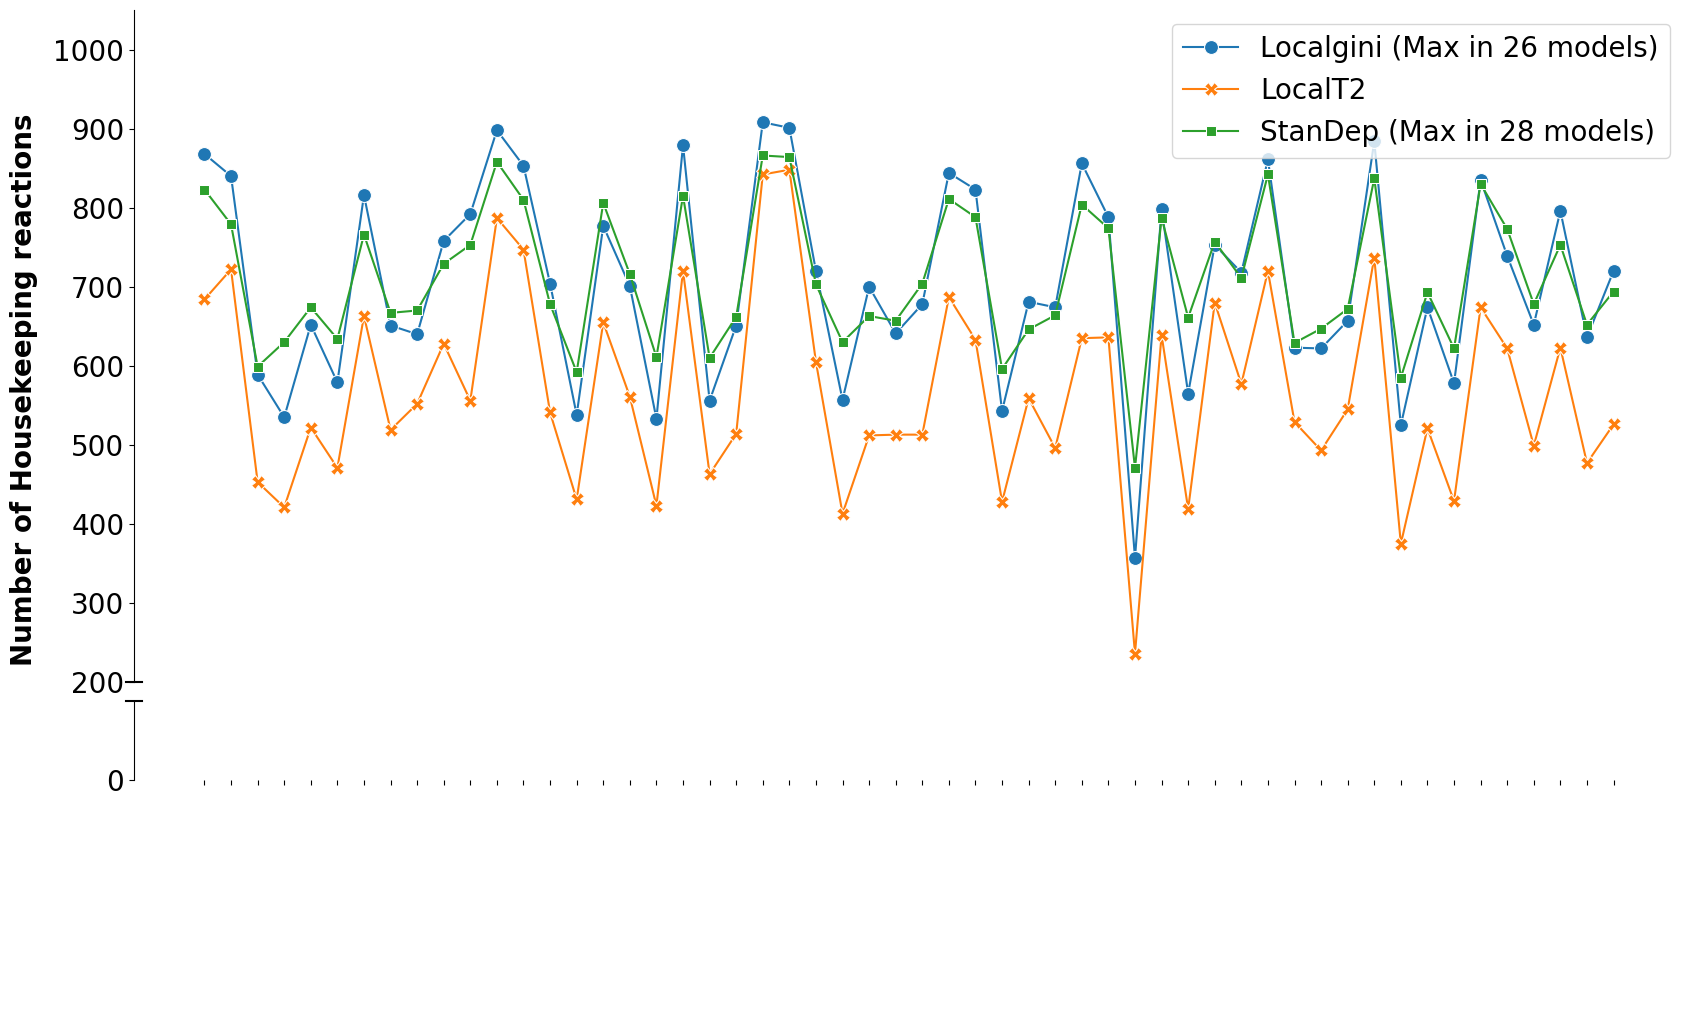

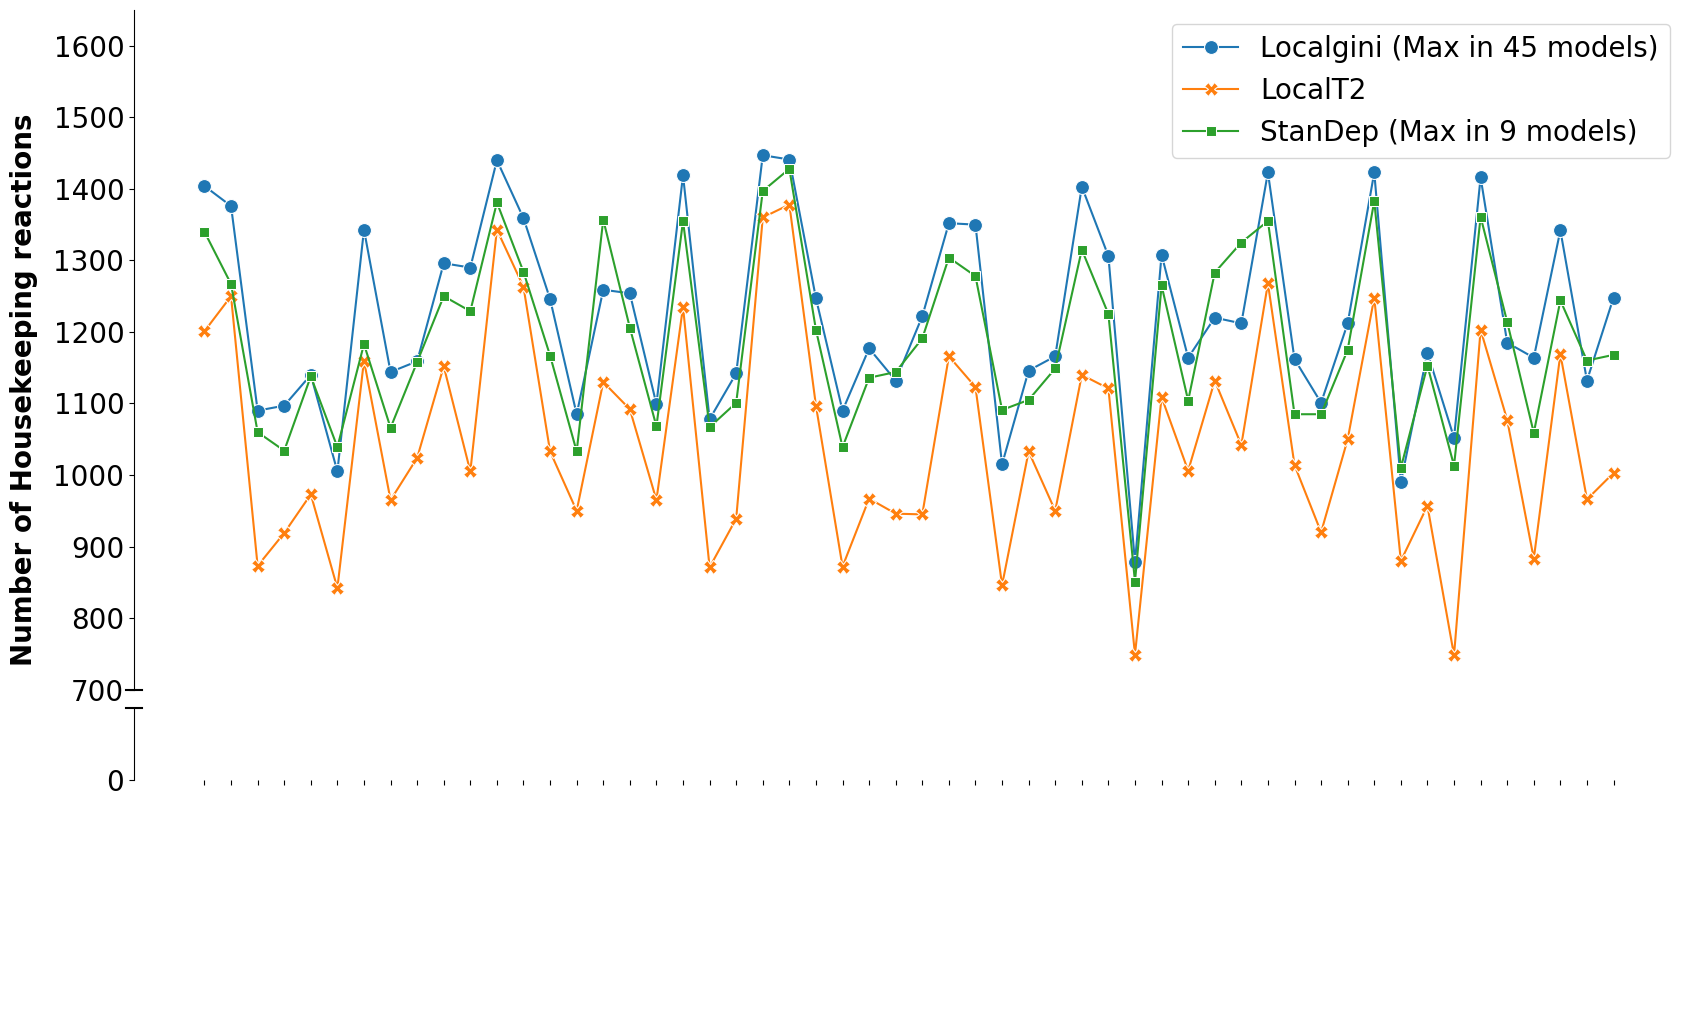

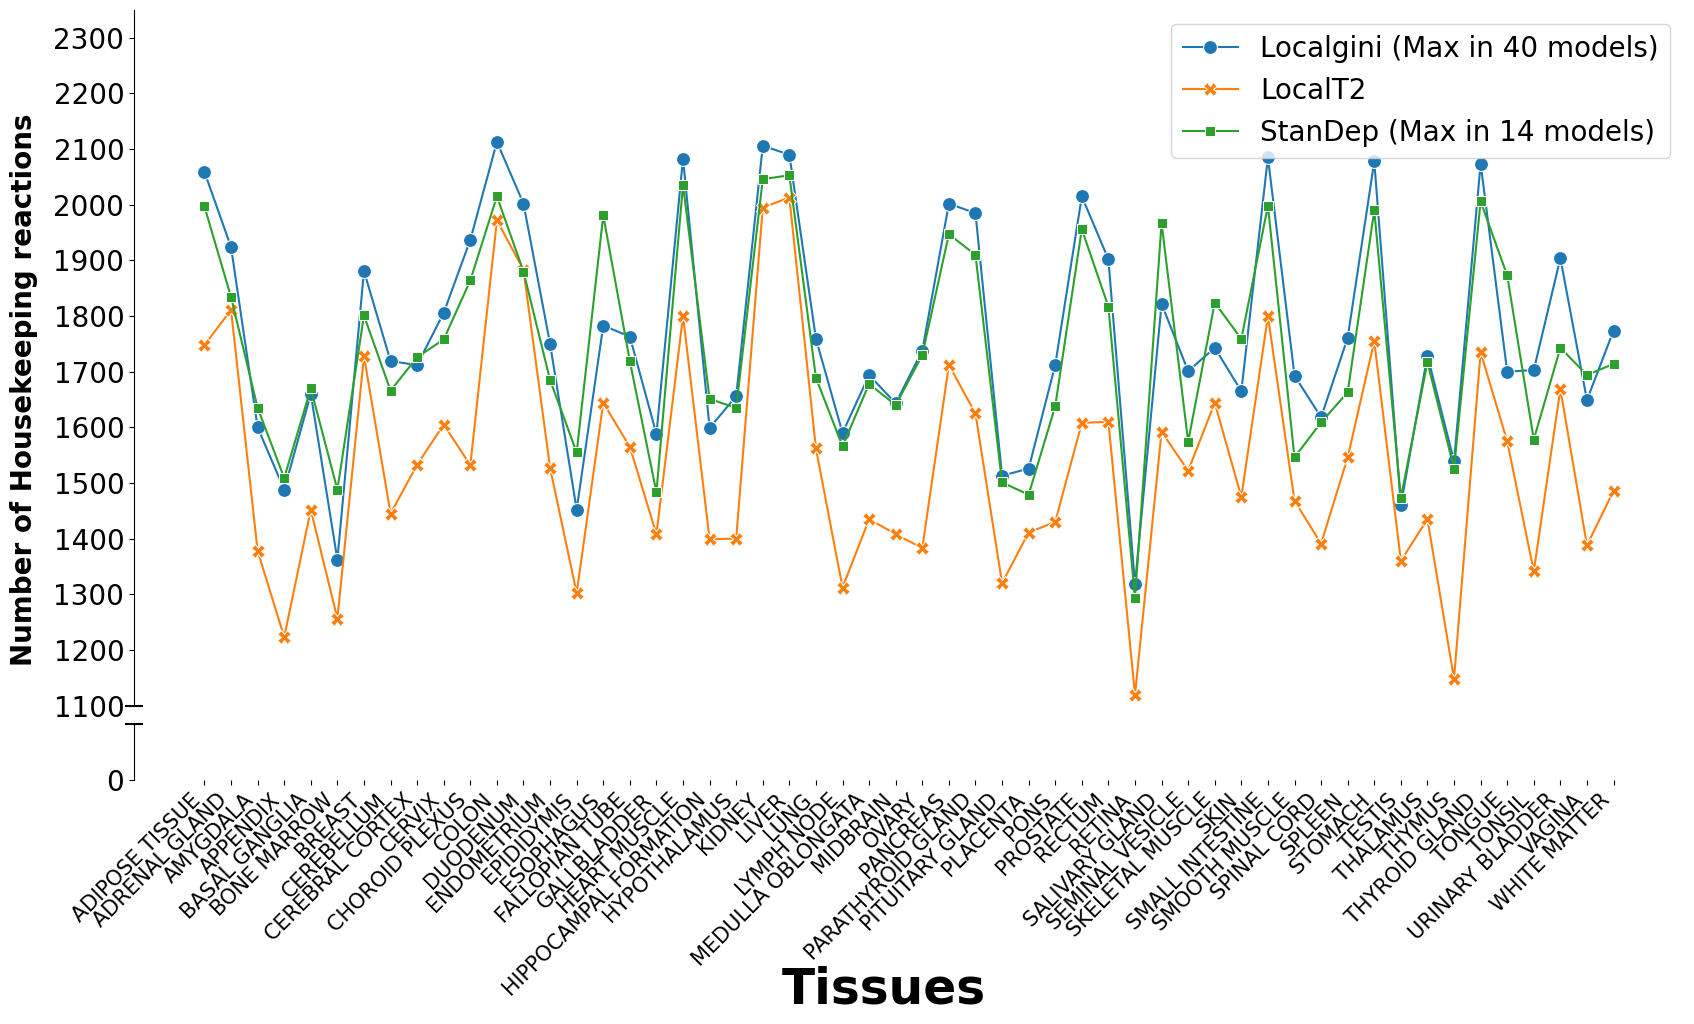

In [3]:
plot_HK_scatter('cancer', 'recon22', 200, 1050,'Cancer cell-lines',0)
plot_HK_scatter('cancer', 'recon3d', 700, 1650,'Cancer cell-lines',0)
plot_HK_scatter('cancer', 'ihuman', 1100, 2350,'Cancer cell-lines',1)

plot_HK_scatter('tissue', 'recon22', 200, 1050,'Tissues',0)
plot_HK_scatter('tissue', 'recon3d', 700, 1650,'Tissues',0)
plot_HK_scatter('tissue', 'ihuman', 1100, 2350,'Tissues',1)

# Merging all the figures

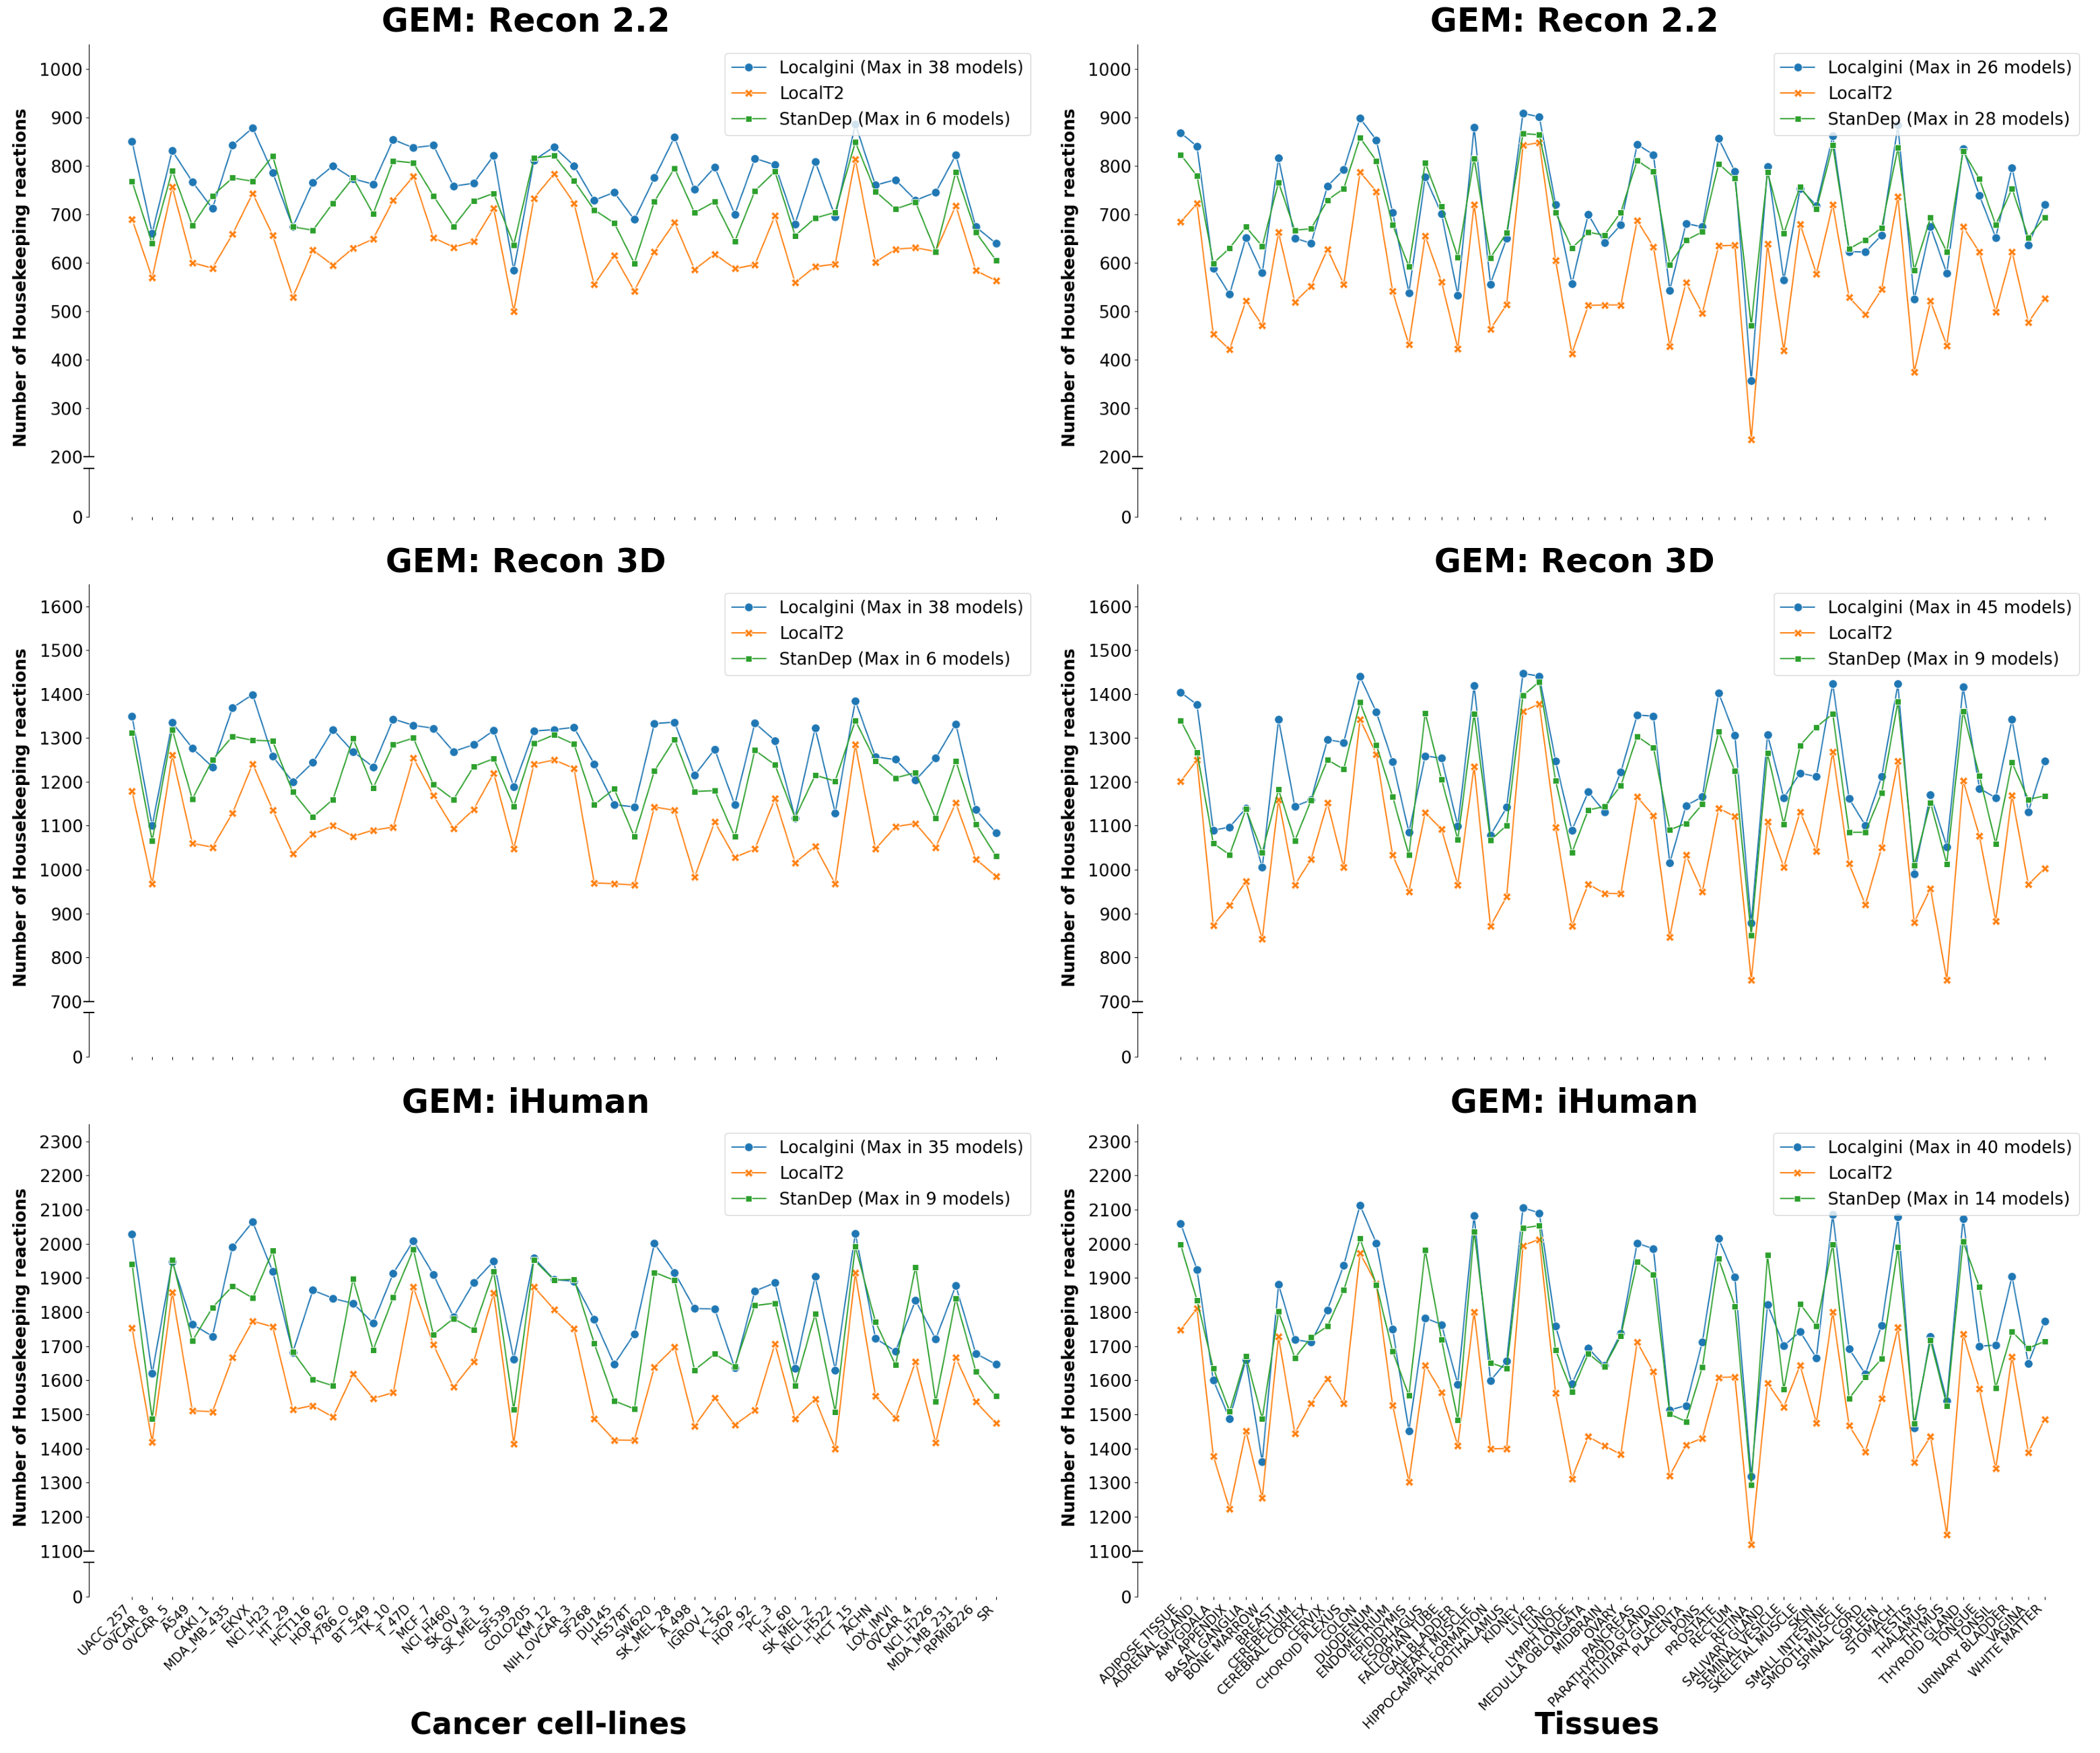

In [4]:
c_r2 = plt.imread('HK_in_core_cancer_recon22.png')
c_r3 = plt.imread('HK_in_core_cancer_recon3d.png')
c_ih = plt.imread('HK_in_core_cancer_ihuman.png')
t_r2 = plt.imread('HK_in_core_tissue_recon22.png')
t_r3 = plt.imread('HK_in_core_tissue_recon3d.png')
t_ih = plt.imread('HK_in_core_tissue_ihuman.png')
fig,ax = plt.subplots(3,2,figsize=(40,125),gridspec_kw={'hspace': -0.9, 'wspace':0.01})
ax[0,0].imshow(c_r2)
ax[0,0].axis('off')
ax[0,0].set_title('GEM: Recon 2.2', fontdict={'fontweight': 'bold','fontsize':'35'})
ax[0,1].imshow(t_r2)
ax[0,1].axis('off')
ax[0,1].set_title('GEM: Recon 2.2', fontdict={'fontweight': 'bold','fontsize':'35'})

ax[1,0].imshow(c_r3)
ax[1,0].axis('off')
ax[1,0].set_title('GEM: Recon 3D', fontdict={'fontweight': 'bold','fontsize':'35'})
ax[1,1].imshow(t_r3)
ax[1,1].axis('off')
ax[1,1].set_title('GEM: Recon 3D', fontdict={'fontweight': 'bold','fontsize':'35'})

ax[2,0].imshow(c_ih)
ax[2,0].axis('off')
ax[2,0].set_title('GEM: iHuman', fontdict={'fontweight': 'bold','fontsize':'35'})
ax[2,1].imshow(t_ih)
ax[2,1].axis('off')
ax[2,1].set_title('GEM: iHuman', fontdict={'fontweight': 'bold','fontsize':'35'})
plt.savefig('HK_in_core_line.pdf',bbox_inches='tight')

In [14]:
def plot_HK_violin():
    pal1={'StanDep':'royalblue','LocalT2':'darkorange','Localgini':'g'}
    data1 = sio.loadmat('../HK_reactions_analysis/HK_in_core_cancer.mat')
    data2 = sio.loadmat('../HK_reactions_analysis/HK_in_core_tissue.mat')
    thrs = ['Localgini','StanDep','LocalT2']
    files = ['nHK_LG_','nHK_SD_','nHK_LT2_']
    # defining te maximum number of HK reactions possible in the models
    HK_max_r2 = 932
    HK_max_r3 = 1463
    HK_max_ih = 2128
    hk_max = [HK_max_r2,HK_max_r3,HK_max_ih]
    modelNames = ['Recon 2.2','Recon 3D','iHuman']
    fig,ax = plt.subplots(2,3*2,figsize=(20,20),gridspec_kw={'hspace': 0.1, 'wspace':0.1})
    for k,data in enumerate([data1,data2]):
        contexts = [str(i[0][0]).upper() for i in data['contexts']]
        for i,modelName in enumerate(['recon22','recon3d','ihuman']):
            df = pd.DataFrame(columns = ['Threshold','Fraction of Housekeeping reactions','contexts'])
            for j,t in enumerate(files):
                df = pd.concat([df,pd.DataFrame({'Threshold':[thrs[j]]*len(contexts),'Fraction of Housekeeping reactions':data[t+modelName].flatten()/hk_max[i],'contexts':contexts,
                                                 })],ignore_index=True)
            sns.violinplot(data=df[(df['Threshold']=='Localgini')|(df['Threshold']=='LocalT2')],x='Threshold',y='Fraction of Housekeeping reactions',hue='Threshold',
                           split=True,gap=0.3,ax=ax[k,i*2],inner="quart",palette=pal1,alpha=0.5)
            sns.violinplot(data=df[(df['Threshold']=='Localgini')|(df['Threshold']=='StanDep')],x='Threshold',y='Fraction of Housekeeping reactions',hue='Threshold',
                           split=True,gap=0.3,ax=ax[k,i*2+1],inner="quart",palette=pal1,alpha=0.5)
            ax[k,i*2].spines['right'].set_visible(False)
            ax[k,i*2].spines['top'].set_visible(False)
            ax[k,i*2].spines['bottom'].set_visible(False)
            ax[k,i*2+1].spines['left'].set_visible(False)
            ax[k,i*2+1].spines['top'].set_visible(False)
            ax[k,i*2+1].spines['bottom'].set_visible(False)
            for spine in ax[k,i*2].spines.values():
                spine.set_linewidth(2)
            for spine in ax[k,i*2+1].spines.values():
                spine.set_linewidth(2)
            if k==0:
                ax[k,i*2].set_title(modelNames[i],x=1,fontdict={'fontsize':30,'weight':'bold'})
            ax[k,i*2].set_ylim(0.1,1.2)
            ax[k,i*2+1].set_ylim(0.1,1.2)
            ax[k,i*2].set_ylabel('')
            ax[k,i*2+1].set_ylabel('')
            ax[k,i*2].set_yticks([i*0.1 for i in range(0,11,2)])
            ax[k,i*2+1].set_yticks([])
            ax[k,i*2].set_yticklabels([])
            ax[k,i*2+1].set_yticklabels([])
            ax[k,i*2].set_xlabel('')
            ax[k,i*2].set_xticklabels([])
            ax[k,i*2].set_xticks([])
            ax[k,i*2+1].set_xticks([])
            ax[k,i*2+1].set_xlabel('')
            ax[k,i*2+1].set_xticklabels([])
            if i==0:
                if k==0:
                    ax[k,i].set_ylabel('Fraction of Housekeeping reactions \n captured in cancer data', fontdict={'fontweight': 'bold','fontsize':'20'})
                else:
                    ax[k,i].set_ylabel('Fraction of Housekeeping reactions \n captured in tissue data', fontdict={'fontweight': 'bold','fontsize':'20'})
                ax[k,i].set_yticklabels([round(i*0.1,1) for i in range(0,11,2)], fontsize=15)
            lg_1_count,lg_2_count,lt2_count,sd_count = 0,0,0,0
            for c,con in enumerate(contexts):
                df_temp = df[(df['contexts']==con)]
                lg=df_temp[df_temp['Threshold']=='Localgini']['Fraction of Housekeeping reactions']
                lt2=df_temp[df_temp['Threshold']=='LocalT2']['Fraction of Housekeeping reactions']
                sd=df_temp[df_temp['Threshold']=='StanDep']['Fraction of Housekeeping reactions']
                if lg.values[0]<lt2.values[0]:
                    lt2_count+=1
                else:
                    lg_1_count+=1
                if lg.values[0]<sd.values[0]:
                    sd_count+=1
                else:
                    lg_2_count+=1
                start = 0.3
                disp= 0.4
                ax[k,i*2].scatter([start],lg,color=pal1['Localgini'],s=20)
                ax[k,i*2].scatter([start+disp],lt2,color=pal1['LocalT2'],s=20)
                ax[k,i*2].plot([start,start+disp],[lg,lt2],'-',color='k',linewidth=0.1)

                ax[k,i*2+1].scatter([start],lg,color=pal1['Localgini'],s=20)
                ax[k,i*2+1].scatter([start+disp],sd,color=pal1['StanDep'],s=20)
                ax[k,i*2+1].plot([start,start+disp],[lg,sd],'-',color='k',linewidth=0.1)
            start = -0.2
            disp = 0.8
            ax[k,i*2].text(start,1.1,r'$\uparrow'+str(lg_1_count)+'$',fontsize=20,fontweight='bold')
            ax[k,i*2].text(start+disp,1.1,r'$\uparrow'+str(lt2_count)+'$',fontsize=20,fontweight='bold')
            ax[k,i*2+1].text(start,1.1,r'$\uparrow'+str(lg_2_count)+'$',fontsize=20,fontweight='bold')
            ax[k,i*2+1].text(start+disp,1.1,r'$\uparrow'+str(sd_count)+'$',fontsize=20,fontweight='bold')
            # Get the current positions of the axes
            pos = ax[k,i*2+1].get_position()

            # Adjust the positions to modify spacing
            ax[k,i*2+1].set_position([pos.x0-0.01, pos.y0, pos.width, pos.height])

    labels = ['Localgini','LocalT2','StanDep']
    handles = [Rectangle((0,0),1,1,fc=pal1[i], alpha = 0.5,edgecolor = 'k') for i in labels]
    fig.legend(handles,labels, loc='lower center', bbox_to_anchor=(0.1, 0.05, 0.8, 0.9),frameon=0,mode='expand',ncol=3,prop={'size':30,'weight':'bold'})
    plt.savefig('HK_in_core_violin.pdf',bbox_inches='tight')


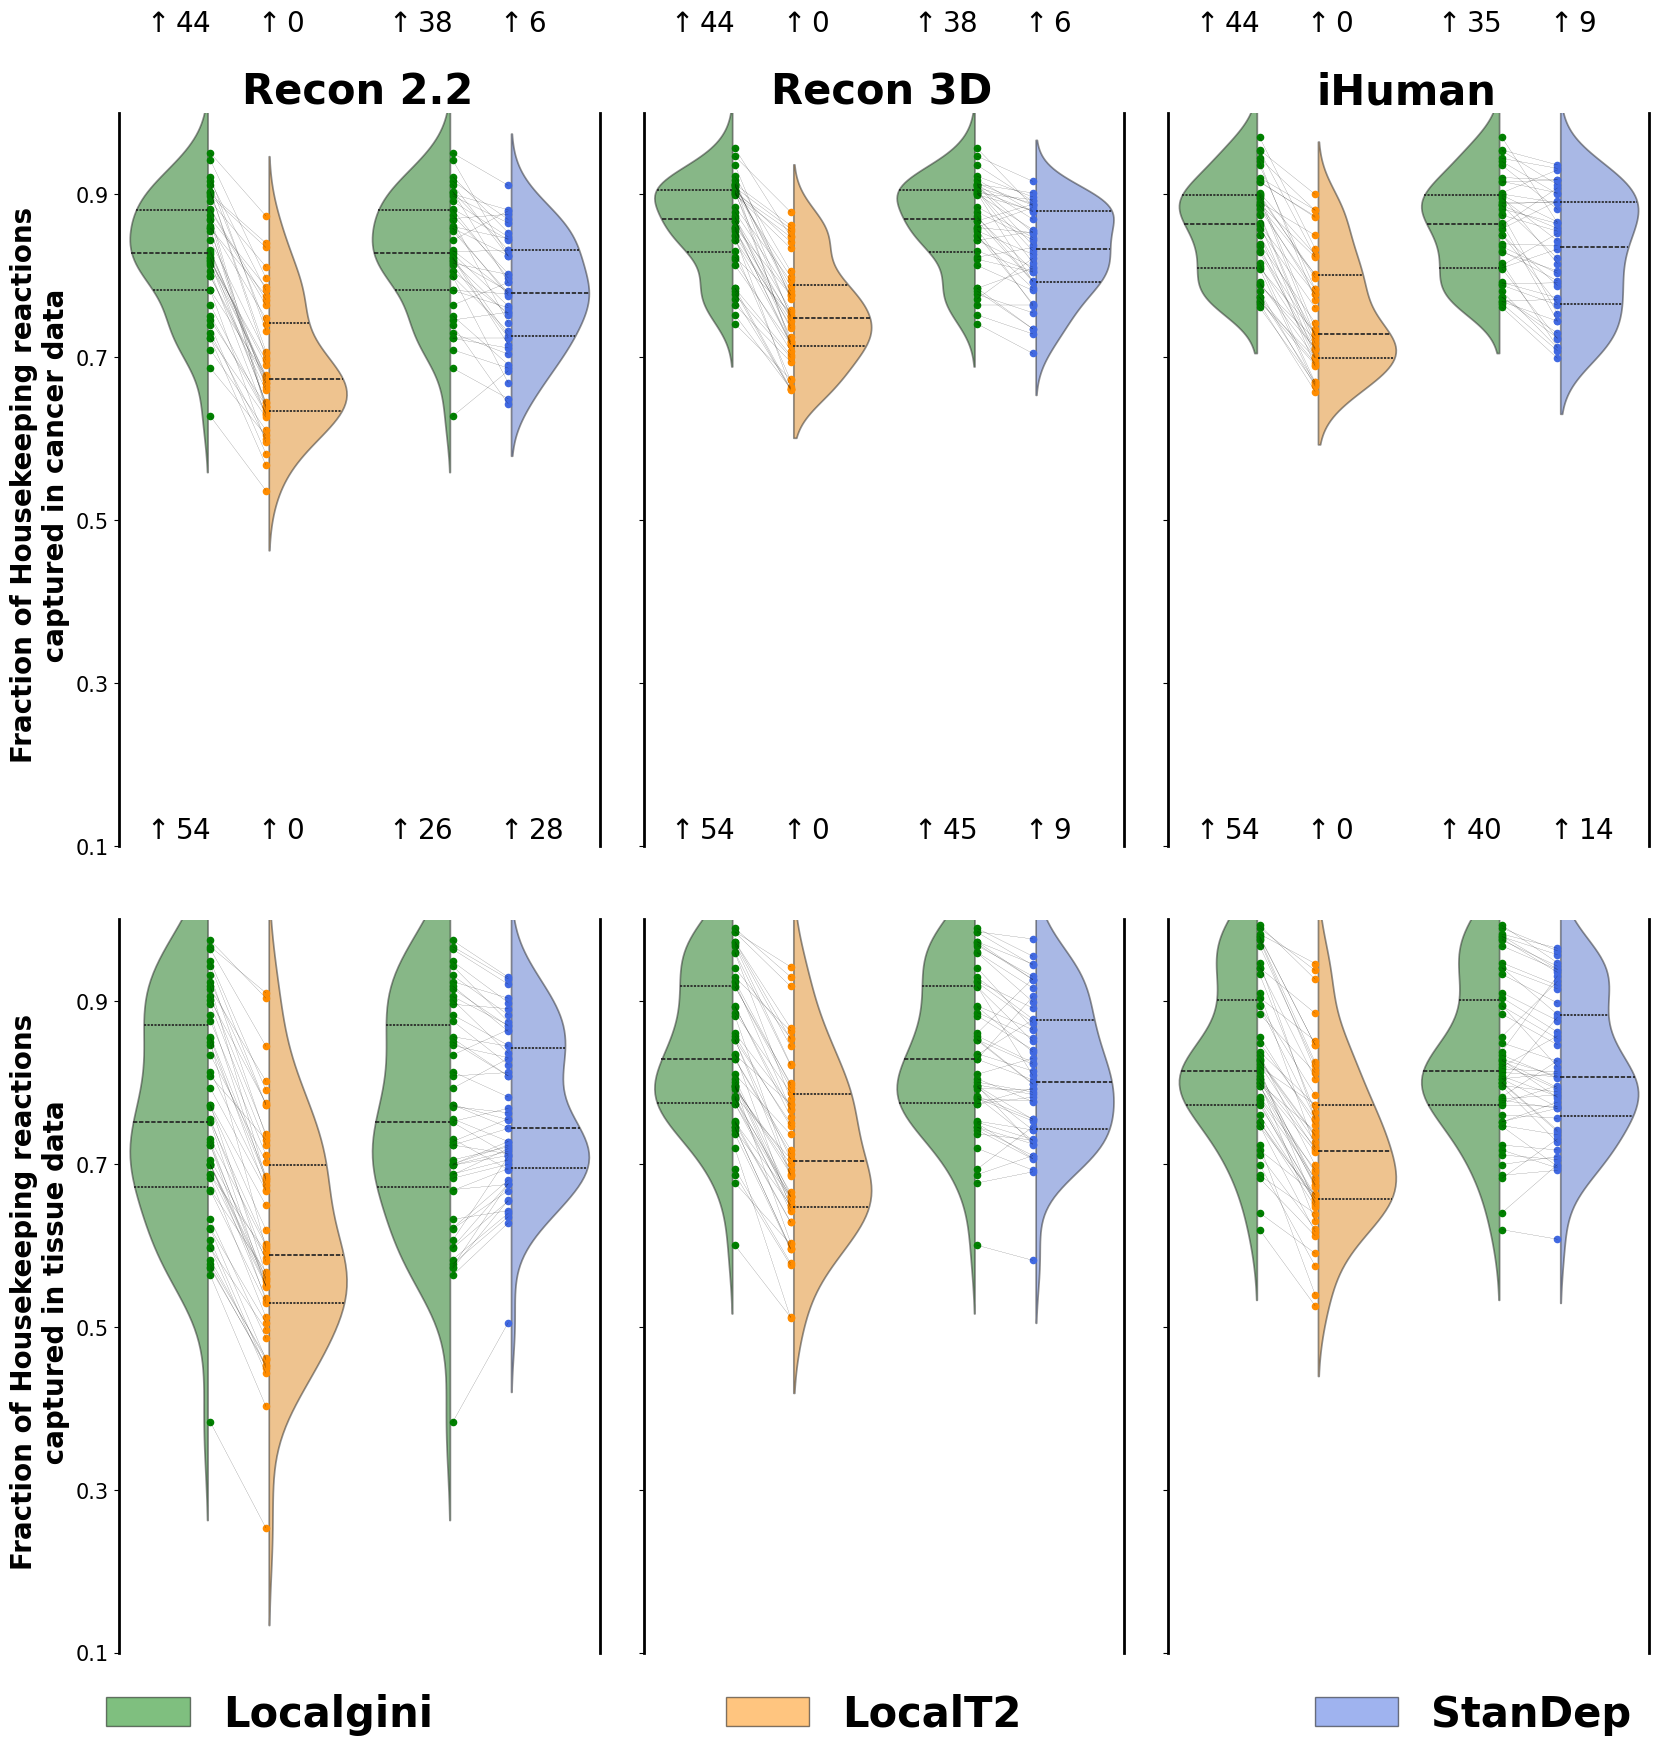

In [15]:
plot_HK_violin()

In [10]:
def plot_HK_violin2():
    pal1={'StanDep':'royalblue','LocalT2':'darkorange','Localgini':'g'}
    data1 = sio.loadmat('../HK_reactions_analysis/HK_in_core_cancer.mat')
    data2 = sio.loadmat('../HK_reactions_analysis/HK_in_core_tissue.mat')
    thrs = ['Localgini','StanDep','LocalT2']
    files = ['nHK_LG_','nHK_SD_','nHK_LT2_']
    alpha=0.7
    # defining te maximum number of HK reactions possible in the models
    HK_max_r2 = 932
    HK_max_r3 = 1463
    HK_max_ih = 2128
    hk_max = [HK_max_r2,HK_max_r3,HK_max_ih]
    modelNames = ['Recon 2.2','Recon 3D','Human1']
    fig,ax = plt.subplots(2,3*2,figsize=(30,20),gridspec_kw={'hspace': 0.1, 'wspace':0.1})
    for k,data in enumerate([data1,data2]):
        contexts = [str(i[0][0]).upper() for i in data['contexts']]
        for i,modelName in enumerate(['recon22','recon3d','ihuman']):
            df = pd.DataFrame(columns = ['Threshold','Fraction of Housekeeping reactions','contexts'])
            for j,t in enumerate(files):
                df = pd.concat([df,pd.DataFrame({'Threshold':[thrs[j]]*len(contexts),'Fraction of Housekeeping reactions':data[t+modelName].flatten()/hk_max[i],'contexts':contexts,
                                                 })],ignore_index=True)
            sns.violinplot(data=df[(df['Threshold']=='Localgini')|(df['Threshold']=='LocalT2')],x='Threshold',y='Fraction of Housekeeping reactions',hue='Threshold',
                           split=True,gap=0.3,ax=ax[k,i*2],inner="quart",palette=pal1,alpha=alpha)
            sns.violinplot(data=df[(df['Threshold']=='Localgini')|(df['Threshold']=='StanDep')],x='Threshold',y='Fraction of Housekeeping reactions',hue='Threshold',
                           split=True,gap=0.3,ax=ax[k,i*2+1],inner="quart",palette=pal1,alpha=alpha)
            ax[k,i*2].spines['right'].set_visible(False)
            ax[k,i*2].spines['top'].set_visible(False)
            ax[k,i*2].spines['bottom'].set_visible(False)
            ax[k,i*2+1].spines['left'].set_visible(False)
            ax[k,i*2+1].spines['top'].set_visible(False)
            ax[k,i*2+1].spines['bottom'].set_visible(False)
            for spine in ax[k,i*2].spines.values():
                spine.set_linewidth(2)
            for spine in ax[k,i*2+1].spines.values():
                spine.set_linewidth(2)
            if k==0:
                ax[k,i*2].set_title(modelNames[i],x=1,fontdict={'fontsize':30,'weight':'bold'})
            ax[k,i*2].set_ylim(0.1,1.1)
            ax[k,i*2+1].set_ylim(0.1,1.1)
            ax[k,i*2].set_ylabel('')
            ax[k,i*2+1].set_ylabel('')
            ax[k,i*2].set_yticks([i*0.1 for i in range(1,11,2)])
            ax[k,i*2+1].set_yticks([])
            ax[k,i*2].set_yticklabels([])
            ax[k,i*2+1].set_yticklabels([])
            ax[k,i*2].set_xlabel('')
            ax[k,i*2].set_xticklabels([])
            ax[k,i*2].set_xticks([])
            ax[k,i*2+1].set_xticks([])
            ax[k,i*2+1].set_xlabel('')
            ax[k,i*2+1].set_xticklabels([])
            if i==0:
                if k==0:
                    ax[k,i].set_ylabel('Fraction of Housekeeping reactions \n captured in cancer data', fontdict={'fontweight': 'bold','fontsize':'20'})
                else:
                    ax[k,i].set_ylabel('Fraction of Housekeeping reactions \n captured in tissue data', fontdict={'fontweight': 'bold','fontsize':'20'})
                ax[k,i].set_yticklabels([round(i*0.1,1) for i in range(1,11,2)], fontsize=20)
            lg_1_count,lg_2_count,lt2_count,sd_count = 0,0,0,0
            for c,con in enumerate(contexts):
                df_temp = df[(df['contexts']==con)]
                lg=df_temp[df_temp['Threshold']=='Localgini']['Fraction of Housekeeping reactions']
                lt2=df_temp[df_temp['Threshold']=='LocalT2']['Fraction of Housekeeping reactions']
                sd=df_temp[df_temp['Threshold']=='StanDep']['Fraction of Housekeeping reactions']
                if lg.values[0]<lt2.values[0]:
                    lt2_count+=1
                else:
                    lg_1_count+=1
                if lg.values[0]<sd.values[0]:
                    sd_count+=1
                else:
                    lg_2_count+=1
                start = 0.3
                disp= 0.4
                ax[k,i*2].scatter([start],lg,color=pal1['Localgini'],s=20)
                ax[k,i*2].scatter([start+disp],lt2,color=pal1['LocalT2'],s=20)
                ax[k,i*2].plot([start,start+disp],[lg,lt2],'-',color='k',linewidth=0.1)
                

                ax[k,i*2+1].scatter([start],lg,color=pal1['Localgini'],s=20)
                ax[k,i*2+1].scatter([start+disp],sd,color=pal1['StanDep'],s=20)
                ax[k,i*2+1].plot([start,start+disp],[lg,sd],'-',color='k',linewidth=0.05)
            ax[k,i*2].plot([start,start,start+disp,start+disp],[0.12,0.1,0.1,0.12],'-',color='k')
            ax[k,i*2+1].plot([start,start,start+disp,start+disp],[0.12,0.1,0.1,0.12],'-',color='k')
            # Get the current positions of the axes
            pos = ax[k,i*2+1].get_position()

            # Adjust the positions to modify spacing
            ax[k,i*2+1].set_position([pos.x0-0.01, pos.y0, pos.width, pos.height])
            
            lg_= data['nHK_LG_'+modelName][0].astype(np.int32)/hk_max[i]
            lt2_ = data['nHK_LT2_'+modelName][0].astype(np.int32)/hk_max[i]
            sd_ = data['nHK_SD_'+modelName][0].astype(np.int32)/hk_max[i]
            p_lg_lt2 = wilcoxon(lg_,lt2_,alternative='greater')
            p_lg_lt2 = p_lg_lt2.pvalue
            if p_lg_lt2<0.01:
                txt1 = '*'
            else:
                txt1 = 'P-value: '+str(round(p_lg_lt2,2))
            p_lg_sd = wilcoxon(lg_,sd_,alternative='greater')
            p_lg_sd = p_lg_sd.pvalue
            if p_lg_sd<0.01:
                txt2 = '*'
            else:
                txt2 = 'ns'
            ax[k,i*2].text(start+disp/2,0.06,txt1,fontsize=25,horizontalalignment='center')
            ax[k,i*2+1].text(start+disp/2,0.06,txt2,fontsize=25,horizontalalignment='center')
    labels = ['Localgini','LocalT2','StanDep']
    handles = [Rectangle((0,0),1,1,fc=pal1[i], alpha = alpha,edgecolor = 'k') for i in labels]
    fig.legend(handles,labels, loc='lower center', bbox_to_anchor=(0.1, 0.05, 0.8, 0.9),frameon=0,mode='expand',ncol=3,prop={'size':30,'weight':'bold'})
    plt.savefig('HK_in_core_violin.png',bbox_inches='tight')


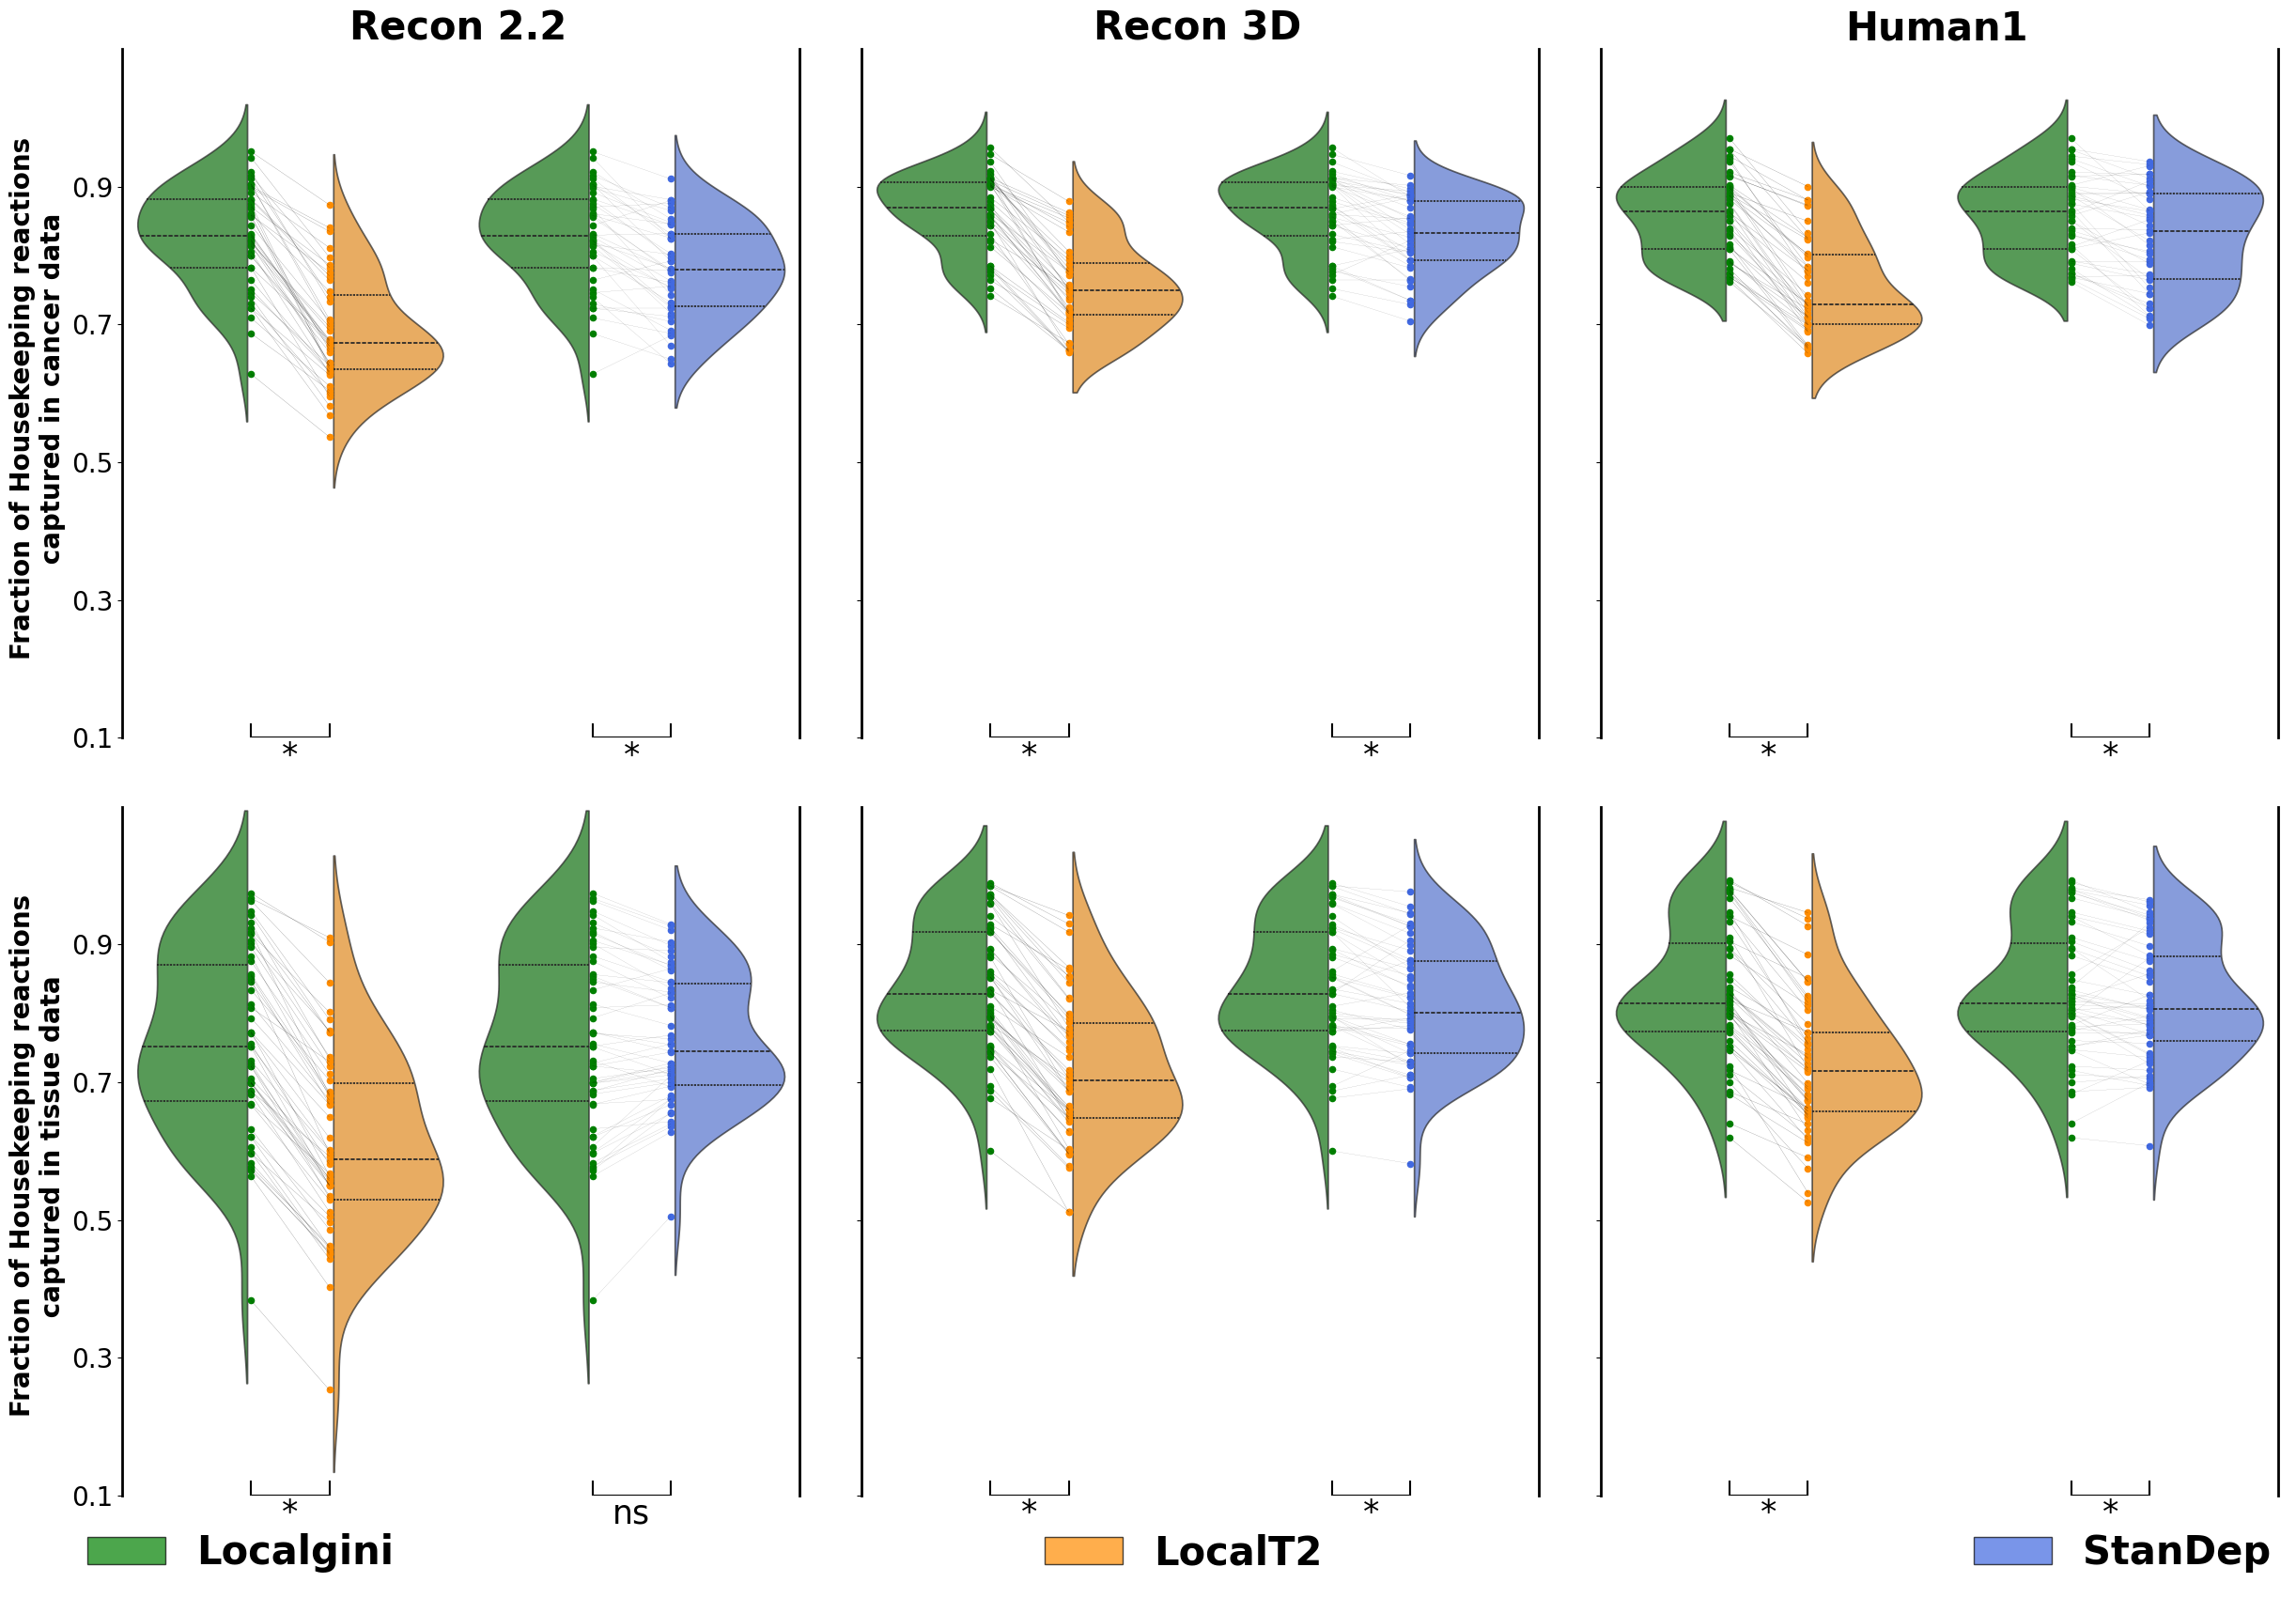

In [11]:
plot_HK_violin2()